In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [43]:
# !pip install tensorflow

In [44]:
# !pip install keras

In [ ]:
from keras.layers import Input, Dense, Add, Dropout
from keras.models import Model
from keras import regularizers
from keras import optimizers
import re
import tensorflow as tf #tensorflow
from tensorflow import keras #keras
from tensorflow.keras import layers #layers
from keras import backend as K #keras backend
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
import os
path = os.getcwd() + "/fifa_cleaned.csv"
fifa = pd.read_csv(path)
fifa.info()
fifa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18944 non-null  int64  
 1   short_name                  18944 non-null  object 
 2   age                         18944 non-null  int64  
 3   height_cm                   18944 non-null  int64  
 4   weight_kg                   18944 non-null  int64  
 5   nationality                 18944 non-null  object 
 6   club_name                   18719 non-null  object 
 7   league_name                 18719 non-null  object 
 8   league_rank                 18944 non-null  int64  
 9   overall                     18944 non-null  float64
 10  potential                   18944 non-null  float64
 11  value_eur                   18944 non-null  int64  
 12  wage_eur                    18944 non-null  int64  
 13  player_positions            189

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,high_Work_Rate,low_Work_Rate,medium_Work_Rate,right_foot,left_foot
0,158023,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1,0.93,...,6,11,15,14,8,0,1,1,0,1
1,20801,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1,0.92,...,7,11,15,14,11,1,1,0,1,0
2,200389,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1,0.91,...,87,92,78,90,90,0,0,2,1,0
3,188545,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1,0.91,...,15,6,12,8,10,1,0,1,1,0
4,190871,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1,0.91,...,9,9,15,15,11,1,0,1,1,0


In [4]:
fifa_simple=fifa[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]

In [5]:
fifa_simple.head()

,short_name,age,overall,potential,value_eur,wage_eur
0,L. Messi,33,0.93,0.93,67500000,560000
1,Cristiano Ronaldo,35,0.92,0.92,46000000,220000
2,J. Oblak,27,0.91,0.93,75000000,125000
3,R. Lewandowski,31,0.91,0.91,80000000,240000
4,Neymar Jr,28,0.91,0.91,90000000,270000


In [6]:
fifa_simple.corr()

,age,overall,potential,value_eur,wage_eur
age,1.000000,0.468197,-0.262195,0.084973,0.157284
overall,0.468197,1.000000,0.636366,0.630085,0.574230
potential,-0.262195,0.636366,1.000000,0.571925,0.474696
value_eur,0.084973,0.630085,0.571925,1.000000,0.840126
wage_eur,0.157284,0.574230,0.474696,0.840126,1.000000


In [7]:
#Trainig & fitting the model
fifa_train, fifa_test = train_test_split(fifa, test_size=0.25, random_state=88)
fifa_train.shape, fifa_test.shape

x_train = fifa_train[['age','value_eur','potential','wage_eur']]
y_train = fifa_train[['overall']]


In [8]:
linreg = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
linreg.fit(x_train_poly, y_train)


LinearRegression()

In [9]:
#Testing the model
x_test = fifa_test[['age','value_eur','potential', 'wage_eur']]
y_test = fifa_test[['overall']]
x_test_poly = poly.fit_transform(x_test)

In [10]:
fifa_pred = linreg.predict(x_test_poly)
r2_score(y_test, fifa_pred)

0.1285285217048644

In [11]:
x_test['Predicted Ratings'] = fifa_pred

/var/folders/8m/tg3g9kn56ws1dgzbmwczfs8h0000gp/T/ipykernel_19504/3373988415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Predicted Ratings'] = fifa_pred


In [12]:
fifa2 = pd.merge(fifa_simple,x_test)
fifa2.head(20)


,short_name,age,overall,potential,value_eur,wage_eur,Predicted Ratings
0,Neymar Jr,28,0.91,0.91,90000000,270000,2.070839
1,Alisson,27,0.90,0.91,62500000,160000,0.906962
2,J. Kimmich,25,0.88,0.90,65000000,145000,0.692829
3,S. Handanovič,35,0.88,0.88,16000000,100000,0.911318
4,J. Sancho,20,0.87,0.93,69500000,82000,-0.644706
5,L. Modrić,34,0.87,0.87,24500000,260000,1.232336
6,P. Pogba,27,0.86,0.87,50000000,190000,0.590450
7,David Silva,34,0.86,0.86,22500000,58000,1.070672
8,M. Hummels,31,0.86,0.86,33000000,93000,1.047255
9,Jordi Alba,31,0.86,0.86,32000000,220000,1.137166


In [13]:
fifa_pred2 = linreg.predict(x_train_poly)
x_train['Predicted Ratings'] = fifa_pred2

/var/folders/8m/tg3g9kn56ws1dgzbmwczfs8h0000gp/T/ipykernel_19504/234400576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Predicted Ratings'] = fifa_pred2


In [14]:
fifa3 = pd.merge(fifa_simple,x_train)
fifa3.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,Predicted Ratings
0,L. Messi,33,0.93,0.93,67500000,560000,1.095898
1,Cristiano Ronaldo,35,0.92,0.92,46000000,220000,0.918280
2,J. Oblak,27,0.91,0.93,75000000,125000,0.329617
3,R. Lewandowski,31,0.91,0.91,80000000,240000,0.727794
4,K. De Bruyne,29,0.91,0.91,87000000,370000,1.197303
5,K. Mbappé,21,0.90,0.95,105500000,160000,0.877172
6,M. ter Stegen,28,0.90,0.93,69500000,260000,0.940441
7,V. van Dijk,28,0.90,0.91,75500000,210000,1.016437
8,S. Mané,28,0.90,0.90,78000000,250000,0.863176
9,S. Mané,28,0.90,0.90,78000000,250000,0.863176


In [15]:
#new approach
X_train2=pd.get_dummies(fifa.drop(['overall'],axis=1))
y_train2=fifa['overall']

X_test2=pd.get_dummies(fifa.drop(['overall'],axis=1))
y_test2=fifa['overall']

In [16]:
linear_model = smf.ols(formula="overall ~ age + value_eur + potential + wage_eur", data=fifa_train).fit()

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.128e+04
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:21:16   Log-Likelihood:                 31327.
No. Observations:               14208   AIC:                        -6.264e+04
Df Residuals:                   14203   BIC:                        -6.261e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1676      0.004    -41.534      0.0

In [ ]:
#linear_model = smf.ols(formula="overall ~ age + height_cm + weight_kg + nationality + club_name + league_name + \
                                 #league_rank + overall + potential + value_eur + wage_eur + player_positions + \
                                 #international_reputation + weak_foot + skill_moves + release_clause_eur + \
                                 #pace + shooting + passing + dribbling + defending + physic + gk_diving + \
                                 #gk_handling + gk_kicking + gk_reflexes + gk_speed + gk_positioning + player_traits + \
                                 #attacking_crossing + attacking_finishing + attacking_heading_accuracy + \
                                 #attacking_short_passing + attacking_volleys + skill_dribbling + skill_curve + \
                                 #skill_fk_accuracy + skill_long_passing + skill_ball_control + movement_acceleration +\
                                 #movement_sprint_speed + movement_agility + movement_reactions + movement_balance +\
                                 #power_shot_power + power_jumping + power_stamina + power_strength + power_long_shots +\
                                 #mentality_aggression + mentality_interceptions + mentality_positioning +\
                                 #mentality_vision + mentality_penalties + mentality_composure + defending_marking +\
                                 #defending_standing_tackle + defending_sliding_tackle + goalkeeping_diving +\
                                 #goalkeeping_handling + goalkeeping_kicking + goalkeeping_positioning +\
                                 #goalkeeping_reflexes + high_Work_Rate + low_Work_Rate + medium_Work_Rate + \
                                 #right_foot + left_foot", data=fifa_train).fit()

#print(linear_model.summary())

In [17]:
list(fifa.columns)

['sofifa_id',
 'short_name',
 'age',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mental

In [18]:
fifa_new=fifa.drop(['sofifa_id', 'short_name','nationality','club_name','league_name','player_traits'], axis=1)

In [19]:
fifa_new.head()

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,high_Work_Rate,low_Work_Rate,medium_Work_Rate,right_foot,left_foot
0,33,170,72,1,0.93,0.93,67500000,560000,1,5,...,6,11,15,14,8,0,1,1,0,1
1,35,187,83,1,0.92,0.92,46000000,220000,1,5,...,7,11,15,14,11,1,1,0,1,0
2,27,188,87,1,0.91,0.93,75000000,125000,4,3,...,87,92,78,90,90,0,0,2,1,0
3,31,184,80,1,0.91,0.91,80000000,240000,1,4,...,15,6,12,8,10,1,0,1,1,0
4,28,175,68,1,0.91,0.91,90000000,270000,1,5,...,9,9,15,15,11,1,0,1,1,0


<AxesSubplot:>

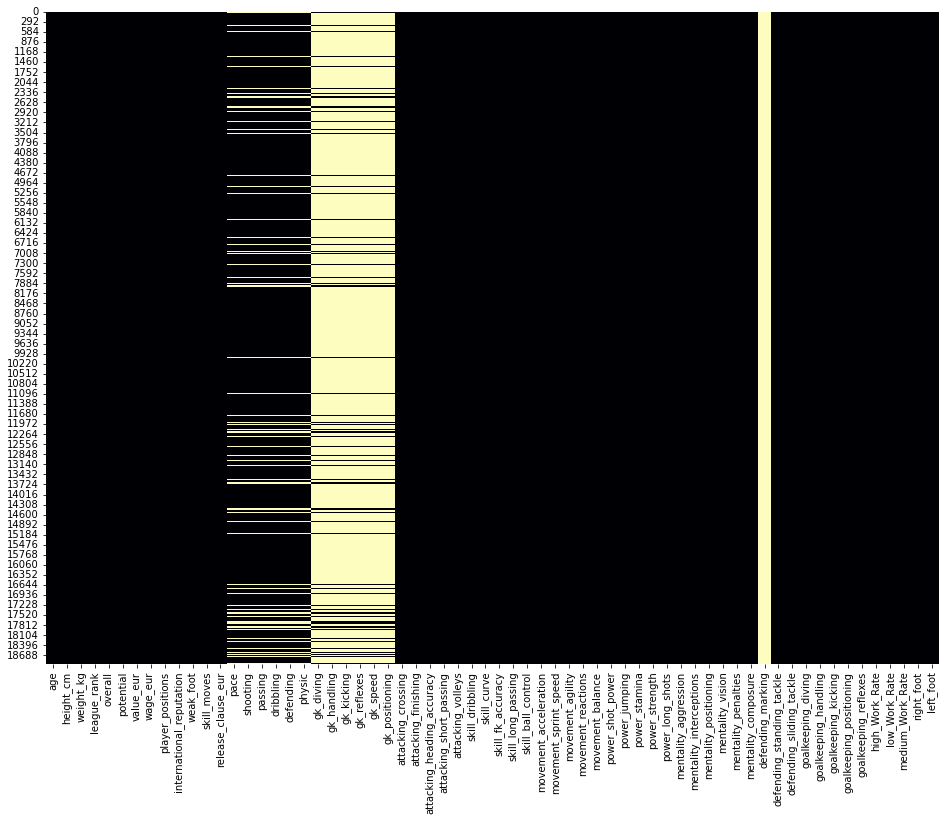

In [20]:
plt.figure(figsize = (16,12))
sns.heatmap(fifa_new.isnull(), cbar=False , cmap = 'magma')

In [21]:
fifa_new = fifa_new.dropna(axis=1)
fifa_new

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,high_Work_Rate,low_Work_Rate,medium_Work_Rate,right_foot,left_foot
0,33,170,72,1,0.93,0.93,67500000,560000,1,5,...,6,11,15,14,8,0,1,1,0,1
1,35,187,83,1,0.92,0.92,46000000,220000,1,5,...,7,11,15,14,11,1,1,0,1,0
2,27,188,87,1,0.91,0.93,75000000,125000,4,3,...,87,92,78,90,90,0,0,2,1,0
3,31,184,80,1,0.91,0.91,80000000,240000,1,4,...,15,6,12,8,10,1,0,1,1,0
4,28,175,68,1,0.91,0.91,90000000,270000,1,5,...,9,9,15,15,11,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,24,176,73,1,0.47,0.52,40000,500,2,1,...,10,9,14,6,6,0,0,2,1,0
18940,21,177,70,1,0.47,0.52,35000,1000,3,1,...,12,13,8,14,6,0,2,0,1,0
18941,20,185,74,1,0.47,0.51,35000,1000,3,1,...,12,9,14,15,13,0,1,1,1,0
18942,23,186,80,1,0.47,0.51,40000,1000,2,1,...,15,7,7,5,13,0,2,0,1,0


<AxesSubplot:>

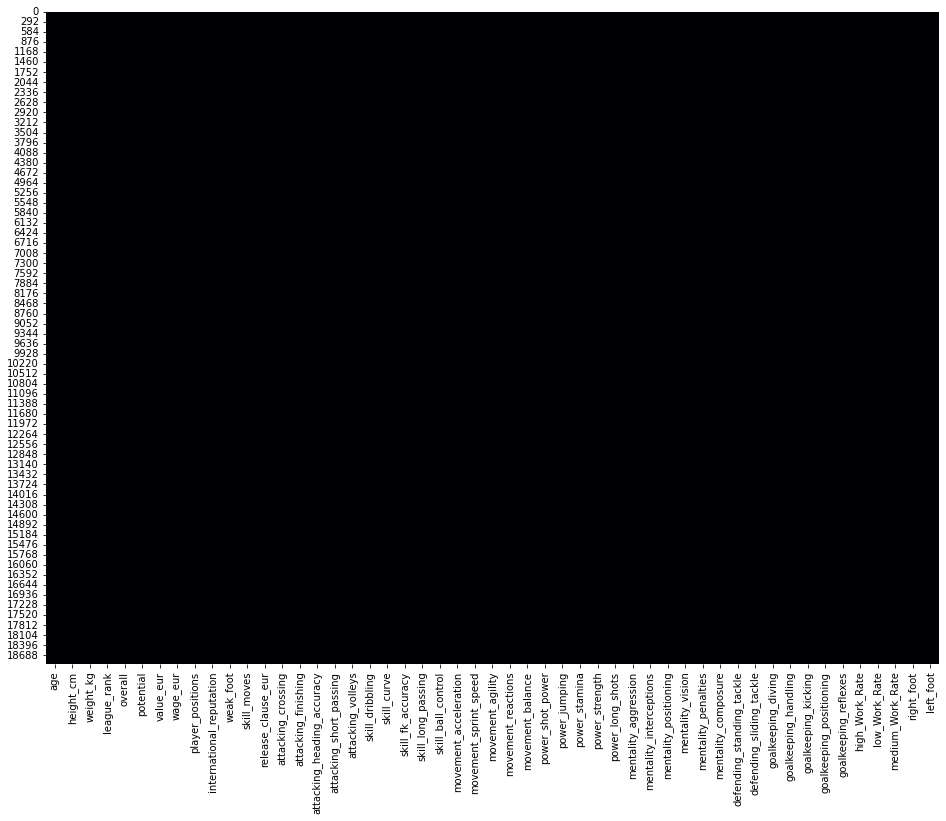

In [22]:
plt.figure(figsize = (16,12))
sns.heatmap(fifa_new.isnull(), cbar=False , cmap = 'magma')

In [1]:
# mean = fifa_new['dribbling'].mean()
# fifa_new['dribbling'].fillna(mean, inplace = True)


In [2]:
#mean = fifa_new['passing'].mean()
#fifa_new['passing'].fillna(mean, inplace = True)


In [3]:
#mean = fifa_new['shooting'].mean()
#fifa_new['shooting'].fillna(mean, inplace = True)


In [4]:
#mean = fifa_new['pace'].mean()
#fifa_new['pace'].fillna(mean, inplace = True)


In [5]:
#mean = fifa_new['defending'].mean()
#fifa_new['defending'].fillna(mean, inplace = True)


In [6]:
#mean = fifa_new['physic'].mean()
#fifa_new['physic'].fillna(mean, inplace = True)


In [23]:
# fifa_new=fifa_new.drop(['defending_marking','gk_diving',
#  'gk_handling',
#  'gk_kicking',
#  'gk_reflexes',
#  'gk_speed',
#  'gk_positioning'], axis=1)

KeyError: "['defending_marking', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'] not found in axis"

<AxesSubplot:>

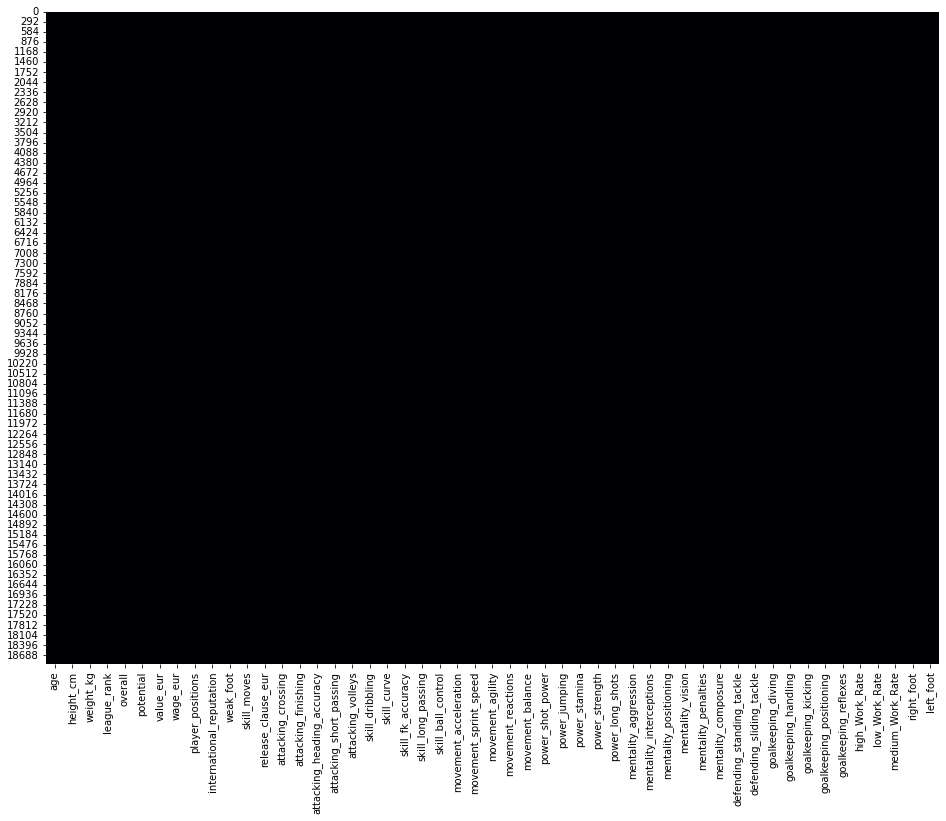

In [24]:
plt.figure(figsize = (16,12))
sns.heatmap(fifa_new.isnull(), cbar=False , cmap = 'magma')

In [25]:
#Trainig & fitting the model
fifa_train_new, fifa_test_new = train_test_split(fifa_new, test_size=0.25, random_state=88)
fifa_train_new.shape, fifa_test_new.shape

((14208, 51), (4736, 51))

In [26]:
#VIF
cols_fifa_new = fifa_train_new.columns[fifa_train_new.columns != 'overall'] 
X_train_fifa_new=fifa_new.drop(['overall'],axis=1)
y_train_fifa_new=fifa_new['overall']

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_fifa_new.values, i) for i in range(1, X_train_fifa_new.shape[1])] 
vif

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  # the dataframe passed to VIF must include the intercept term. We add it the same way we did before.
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

/Users/anshulnidhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [28]:
VIF(fifa_train_new, cols_fifa_new)

/Users/anshulnidhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/anshulnidhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


age                            3.609781
height_cm                      4.007002
weight_kg                      3.300760
league_rank                    1.097765
potential                      3.729099
value_eur                     42.674869
wage_eur                       4.011401
player_positions               6.813863
international_reputation       1.903710
weak_foot                      1.226614
skill_moves                    3.565271
release_clause_eur            38.885844
attacking_crossing             7.001214
attacking_finishing           12.486820
attacking_heading_accuracy     6.598598
attacking_short_passing       13.677595
attacking_volleys              7.619175
skill_dribbling               17.246354
skill_curve                    7.387001
skill_fk_accuracy              5.081018
skill_long_passing             7.244188
skill_ball_control            19.761913
movement_acceleration          9.822986
movement_sprint_speed          7.773645
movement_agility               5.170068
